

# Linear Model (Workbook)

### ITCS 5156:  Applied Machine Learning 

# Goal 

The goal of this activity is to introduce the popular ML tool, Scikit.Learn and practice linear regression models with it. You will apply ordinary least squares (LS), regularized linear regression models (i.e., Ridge, Lasso, and Elastic net), and online regression model (stochastic gradient descent) to real data. We will prepare data as we did in last week's practice and then apply these linear models. Follow the TODO titles and comments to finish the activity!

# Agenda

* Sciket.Learn Basics
* Data Preparation
  * Data visualization
  * Data Partitioning
* Least Squares
* Ridge Regression
* Lasso Regression
* Elastic Net
* Stochastic Gradient Descent

# Tables of TODO's


1. [TODO1 (5 points)](#TODO1) 
2. [TODO2 (5 points)](#TODO2) 
3. [TODO3 (5 points)](#TODO3) 
4. [TODO4 (5 points)](#TODO4)  
5. [TODO5 (5 points)](#TODO5) 
6. [TODO6 (5 points)](#TODO6) 
7. [TODO7 (5 points)](#TODO7) 
8. [TODO8 (5 points)](#TODO8) 
9. [TODO9 (5 points)](#TODO9) 
10. [TODO10 (6 points)](#TODO10) 
12. [TODO11 (6 points)](#TODO11) 
13. [TODO12 (5 points)](#TODO12) 
13. [TODO13 (5 points)](#TODO13) 
14. [TODO14 (5 points)](#TODO14) 
15. [TODO15 (7 points)](#TODO15) 
16. [TODO16 (7 points)](#TODO16) 
17. [TODO17 (7 points)](#TODO17) 
18. [TODO18 (7 points)](#TODO18) 
18. [TODO19 (Lead to Canvas Discussion)](#TODO19) 
19. [TODO (Extra Credit)](#TODO_EXTRA) 



In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D
from copy import deepcopy as copy

%matplotlib inline

# Sciket.Learn

[Scikit-learn](https://scikit-learn.org/stable/index.html) is one of the most popular machine learning tools. It is well managed by a lot of contributors and a good organizer group. The design of softeware is well developed, so it is easy to learn and apply to many different data anaylsis applications. 

By running the code cell below, if you have an error to import sklearn or the version is outdated, please follow [the instruction](https://scikit-learn.org/stable/install.html) to install/upgrade scikit-learn.

In [25]:
import sklearn
sklearn.__version__

'0.24.1'

Using scikit-learn is very simple. You can just follow five steps to use it in general:  <br/>
&nbsp;&nbsp;1) import, <br/>
&nbsp;&nbsp;2) prepare data, <br/>
&nbsp;&nbsp;3) initialize (create an object),  <br/>
&nbsp;&nbsp;4) train (fit), <br/>
&nbsp;&nbsp;5) predict (or/and evaluate).  <br/>
  
Although you have already seen examples in the slides, we can give another one here. For now, you don't know need to know what KNN is. 

In [26]:
from sklearn import datasets, neighbors           # 1) import

X, t = datasets.load_digits(return_X_y=True)      # 2) prepare data (from library embeded one)
X = X / X.max()                                   #.     - rescale the X to betweeen 0 and 1

# number of data samples
N = X.shape[0]

# prepare train and test data
i_split = int(0.8 * N)
X_train = X[:i_split]
t_train = t[:i_split]
X_test = X[i_split:]
t_test = t[i_split:]

knn = neighbors.KNeighborsClassifier()            # 3) initialize - create an KNN classifier using default setting

knn.fit(X_train, t_train)                         # 4) train with training data (input, X_train and target, t_train)

knn.score(X_test, t_test)                         # 5) evaluate the model on the entire test data and compute the accuracy


0.9638888888888889

The test accuracy seems good with 96 percent of accuracy. Well, we do not even know what the data is for, what the task is, and what ML model we used here. Let us see by actually see the data and predictions the trained model made to learn about them. 

Here, the data is famous hand-written digit recognition data. Therefore, the task is classify the image (8x8, 64 values after flattened) for right number (from 0 to 9). Here are the example codes to predict and plot the results. 

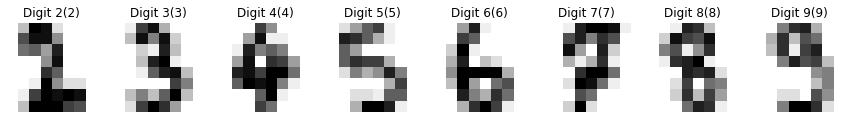

In [27]:
k = 8  # the number of data samples to check

y = knn.predict(X_test[0:k])                     # 5) predict - for the first k data samples in X_test

# plot the digits along with "label (prediction)"
_, axes = plt.subplots(1, k, figsize=(15,3))
for ax, image, label, pred in zip(axes, X_test[:k], t_test[:k], y):
    
    ax.set_axis_off()
    ax.imshow(image.reshape((8,8)), cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Digit {}({})'.format(label, pred))


# Data Preparation

Well... It is a bit awkward to introduce classification example for the regression module. Let us come back to the regression problem. 

This week, we will play with the [Wine Quality Data Set](https://archive.ics.uci.edu/ml/datasets/wine+quality) in [UCI Data Repository](https://archive.ics.uci.edu/ml/index.html).
You can download directly from [winequality-red.csv](https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv). 
You do not need to download the names file but you can read it to get informed about the data. Please do not run the code cell below as it fails to run if you don't have the file nor if you are not running this in Linux or Mac.     

<img src="https://archive.ics.uci.edu/ml/assets/MLimages/Large186.jpg" />


In [28]:
!cat winequality.names

Citation Request:
  This dataset is public available for research. The details are described in [Cortez et al., 2009]. 
  Please include this citation if you plan to use this database:

  P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. 
  Modeling wine preferences by data mining from physicochemical properties.
  In Decision Support Systems, Elsevier, 47(4):547-553. ISSN: 0167-9236.

  Available at: [@Elsevier] http://dx.doi.org/10.1016/j.dss.2009.05.016
                [Pre-press (pdf)] http://www3.dsi.uminho.pt/pcortez/winequality09.pdf
                [bib] http://www3.dsi.uminho.pt/pcortez/dss09.bib

1. Title: Wine Quality 

2. Sources
   Created by: Paulo Cortez (Univ. Minho), Antonio Cerdeira, Fernando Almeida, Telmo Matos and Jose Reis (CVRVV) @ 2009
   
3. Past Usage:

  P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. 
  Modeling wine preferences by data mining from physicochemical properties.
  In Decision Support Systems, Elsevier, 47(4):547-553. ISSN: 016

### Goal

What we want to do with this data is developing a linear regression model that predicts the quality of wine, given the physicochemical input variables.
As you can see in the section 7, 1~11 are our input and 12 is the target label that we want to predict. Let us do it now!

Let us first import all the libraries that we need. 

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D
from sklearn import linear_model

%matplotlib inline

## Quick checking the content of the file

You can use `%pfile` (all) or `!head` (Linux or Mac) to quickly check the content of the file. See how the file is formatted so you can get an idea of how to read. 

In [30]:
# add pfile or head command here


## Reading wine quality data

Before start this TODO, make sure download the both winequality-red.csv and winequality-white.csv in the working directory. 

<div id='TODO1'></div>

### TODO1 (5 points):

We are repeating what we did last week, loading data using pands. 

1. Load the winequality-red.csv into variable `df` using pandas library.
2. Print out the dataframe `df`. 


In [31]:
# TODO: Using pandas, read the `winequality-red.csv` dataset into a variable named `df`.



,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


<div id='TODO2'></div>

### TODO2 (5 points):

1. Let us look at the summary of data using `describe` again. 
2. Check the min, max, mean and standard deviation to get some idea of the value distributions.  


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


## Visualize the data

Working for a linear regression, knowing the how the target value varies depending on input variables. So, by using scatter plot, let us see if there is positive or negative correlation between any input feature and the target value. 

<div id='TODO3'></div>

### TODO3 (5 points): 

1. Refer to the last week's lab (TODO9), create the 3 by 4 scatter plots, each plotting the target value (wine quality) against individual input variable. 

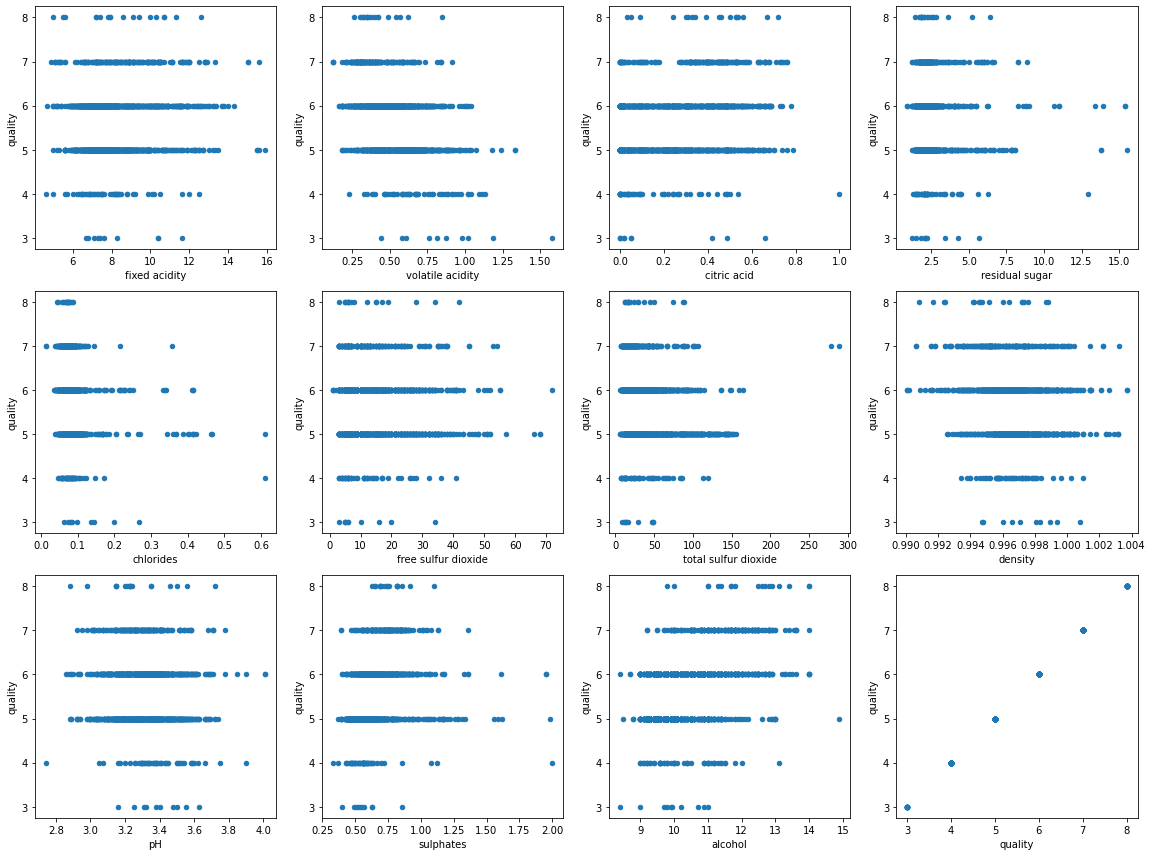

In many times, looking at the data whole is helpful not only the target correlation. One of the reasons is capturing the dependency between input variables. If two highly correlated input variables exist, we can easily ignore one of them as it is redundant. Let say you have two input variable $x_1$ and $x_2$ and $x_2 = 2 \times x_1$. Then, your linear model $y= w_1 x_1 + w_2 x_2 + b$ can be easily converted to $y= 3w x_1 + b$.

<div id='TODO4'> </div>

### TODO4 (5 points):

1. Now, create a scatter plot using the all 12 feature from the `df` dataframe we defined above by using the Pandas `scatter_matrix()` function. 


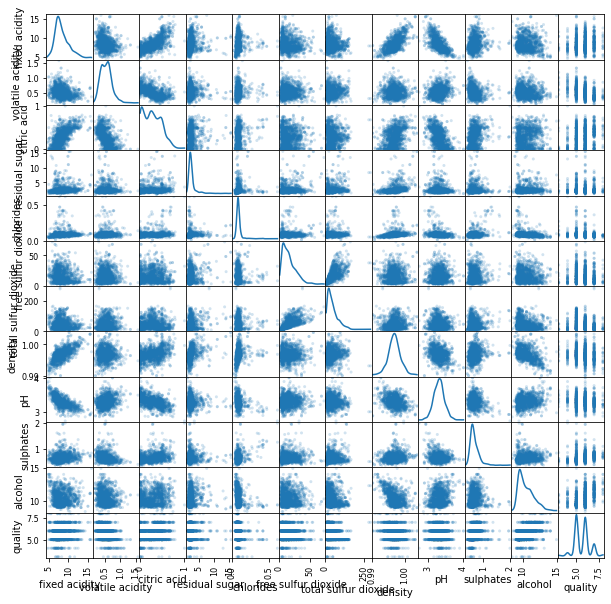

From above figures, we can see the target 'quality' is categorical values ranging from 3 to 8. Let us verify this using the following codes.

In [35]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3])

Yes, it is one of the six values, which  means we can use classification algorithms. We will talk about classification later but we can see how they are grouped together using Andrew's curve. 
Andrew's curve maps the high dimensional data into frequency plot using finite Fourier series. Therefore, you are expected to observe similar frequncy patterns in the graph for the similar data.  You can check David Andrew's paper (Plots of High-Dimensional Data, 1972) by searching through library. 


<div id='TODO5'> </div>

### TODO5 (5 points):

1. Using Pandas `andrew's curve`, produce the curve.
2. Observe the plot.

<AxesSubplot:>

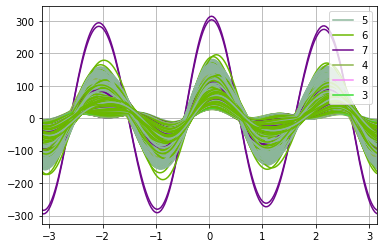

What can you see from the plot? 

Well, there are large data samples overlap, so between 3 and 6, it is hard to see anything particular. Some samples in the quality 7, however, sticks out, which will be interesting how this will impact on ML model performance.

Now, let us look at the target values. 

<div id='TODO6'></div>

### TODO6 (5 points):

1. Create the histogram of target 'quality' data. 
2. Observe the figure.

<AxesSubplot:ylabel='Frequency'>

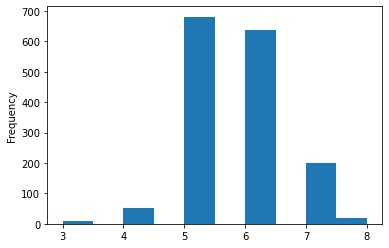

You can see the figure now shows the majority of red wines are 5 or 6 quality. Let us see how this sample imbalance will impact the model performance. 

## Splitting data into input features and targets

Let us have two separate variables for input features and output targets. 
`X` will be used for the input features, `T` for target labels, and `N` for the total number of samples in our data.


<div id='TODO7'></div>

### TODO7 (5 points):

* Assign `T` to the target column 'quality'
* Assign `X` to all the input features, excluding the target column `quality`
* Assign `N` to the total number of samples in our dataset

In [38]:
# TODO: Assign the three X, T, and N variables with proper values.
X = 
T = 
N = 

<div id='TODO8'></div>

### TODO8 (5 points):

1. Split the data using sklearn `train_test_split()` function into a 80/20 split (80% for training and 20% for testing)


In [39]:

X_train, X_test, t_train, t_test = 

print(X.shape, X_train.shape, X_test.shape, t_train.shape, t_test.shape)

(1599, 11) (1279, 11) (320, 11) (1279,) (320,)


# Applying Least Squares
Now it's time to apply least squares to our data in an attempt to develop a model for predicting burned forest area! Recall that the least squares formula is used to generate weights $w$ which can then be used for making predictions given new data. The least squares  formula is given below where the symbol $\cdot$ corresponds to the dot product.

$$
w = (X^T \cdot X)^{-1} \cdot X^T \cdot T
$$

## References
If you want to gain a better understanding of what least squares is doing check out the following references.
* [ Khan Academy](https://www.youtube.com/watch?v=MC7l96tW8V8)
* [Geometric view](https://medium.com/@andrew.chamberlain/the-linear-algebra-view-of-least-squares-regression-f67044b7f39b)


<div id='TODO8'></div>

### TODO9 (5 points):

Well, the model is implemented in `sklearn.linear_model`. 

1. Create the scikit-learn least square object. Make sure to import and use the right object. You can find what to use from the slides. 
2. Apply the least sqaure model for training with `X_train` and `t_train`.
3. Evaluate the model with `score` method.


In [40]:
# 1) import 
from sklearn.linear_model import # TODO: import proper model here

# TODO: 3) initialize


# TODO: 4) train the model


# TODO: 5) evaluate



Test score:  0.29601882394784873


The `score` function calculated the coeffient $R^2$:
$$
 R^2 = 1 - \frac{(t - y)^2}{(t - \bar{t})^2}
$$
where $t$ is target label, $y$ is predicted values, and $\bar{t}$ is mean of target labels. 
When the model is perfect fit, $R^2 =1$. Knowing that, the model seems to be a bit weak. Let us check this with the following plots. 

<div id='TODO10'></div>

First, let us see how close the prediction is to the actual label by comparing the value against the diagonal line after plotting a scatter plot between them (See the figure below). If the predictions are accurate, all the points should lie on the diagonal line. 

### TODO10 (6 points):

1. call `predict` method to make predictions for `X_test` input and store the results to `y`.  
2. Plot `y` against `t_test`.
3. State what you think about the results. 


Text(0, 0.5, 'predicted')

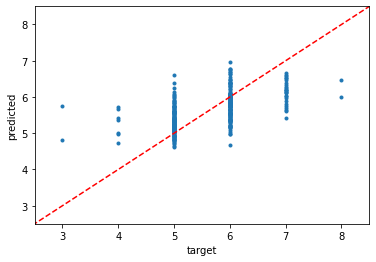

In [41]:

## TODO 1. make a prediction


## TODO 2. plot t_text vs y 


# dashed diagonal line
plt.plot([0,10], [0, 10], 'r--')
# x and y axis range
plt.xlim([2.5, 8.5])
plt.ylim([2.5, 8.5])
# x and y labels
plt.xlabel("target")
plt.ylabel("predicted")


`TODO10.3` Write your thought about the result plot above. 

`Answer`

If you want to look at all the data samples and corresponding predictions, you can plot all the samples as below. 

Text(0, 0.5, 'quality')

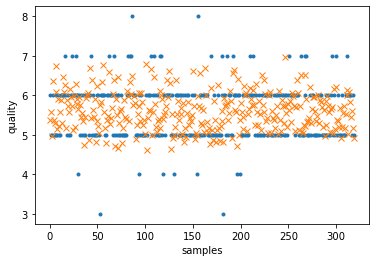

In [42]:
plt.plot(t_test.to_numpy(), '.')
plt.plot(y, 'x')
plt.xlabel("samples")
plt.ylabel("quality")

Well, it is a bit messy when we look at the results here. Let us see the samples by the quality individually. 

<div id='TODO11'></div>

### TODO11 (6 points):

1. Create a plot that shows actual values (blue dots) and predicted values (orange cross) only for each quality.  
  * You are using subplot in prior lab for this. 
  * Hint: Slice the `t_test` and `y`. 
2. Write your thought about what you observe from the figures.

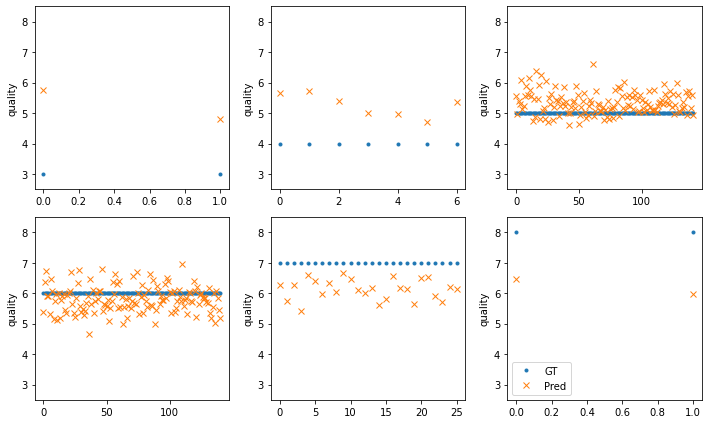

In [43]:
test = t_test.to_numpy()

plt.figure(figsize=(10,6))
for k in range(3,9):
    plt.subplot(2,3, k-2)
    # TODO: add two plt.plot calls to produce scatter plot of GT and Pred

    
    plt.ylim((2.5,8.5))
    plt.ylabel("quality")

plt.legend()
plt.tight_layout()

`TODO11.2` Write your thought about the result plot above. 

`Answer`


We will need this figures for all the other linear regression models. So, let us make them combined in a function `evaluate`. 

<div id='TODO12'></div>

### TODO12 (5 points):

This practice can be done simply copy-and-pasting the codes above to complete. Compare the figure below and fill in the blank properly. 

1. Create a function named `evaluate(y, t)`. 
2. Maintaining the subplot structure as it is, fill in the blank to finish the function.


In [44]:
# evalutate function with above plots

def evaluate(y, t):
    plt.figure(figsize=(10,10))

    # t vs y plot
    plt.subplot(3,3, 1)
    # TODO: add the first plot

    
    
    
    
    # all value comparison
    plt.subplot(3,2, 2)
    # TODO: add the second one

    
    
    # subplots of individual quality comparision
    # TODO: add the third subplots

    
    
    
    
    

When finishing the function, you can call the function as below:

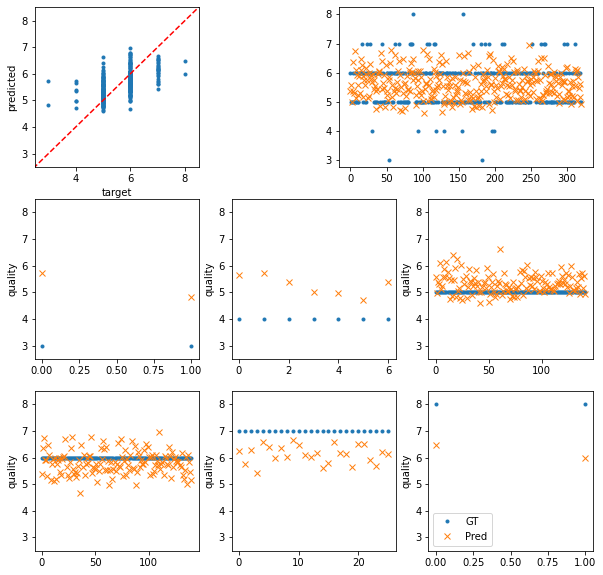

In [45]:
evaluate(y, t_test.to_numpy())

In [46]:
model.coef_

array([ 2.49479394e-02, -1.09170929e+00, -1.33086358e-01, -1.47174485e-03,
       -1.83794883e+00,  5.46821809e-03, -3.63857194e-03, -1.81127106e+01,
       -4.11213431e-01,  9.34865805e-01,  2.82360163e-01])

In [47]:
model.intercept_

22.150029398398452

## Weight Observation

The previous cells print out the weights and intercept. What are they for?

Often, the weights contain meaningful information to understand the data and machine learning model. For instance, as the following figure, you can see how each input variable contribute the final predictions. 

To make the presentation as informative as possible, it add the weights values on top of the bar chart. But here what you are doing is simply bar plot using `bar` function in matplotlib. 

<div id='TODO13'></div>

### TODO13 (5 points):

1. Read the code below and find the TODO comment.
2. Add one line of code to complete the show_weights function.

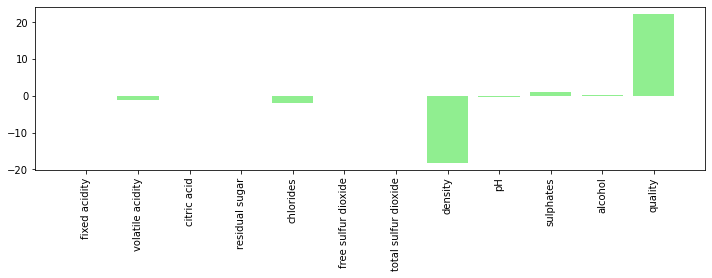

In [48]:

# print the value text over the bar
# https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/barchart.html
def autolabel(ax, rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:0.3f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', color='blue')

def show_weights(model, names):
    
    # combine both the coefficients and intercept to present
    w = np.append(model.coef_, model.intercept_)


    plt.figure(figsize=(12,3))
    
    # TODO: create bar chart to present the w

    
    ax = plt.gca()
    ax.set_xticks(range(len(w)))
    ax.set_xticklabels(names, rotation = 90)
#     # manual positioning the label text - replaced with autolabel     
#     for i, v in enumerate(w):
#         ax.text(i - 0.25, v*1.05, "{:.2f}".format(v), color='red')

show_weights(model, df.columns.values)

It looks density must have highest conntribution with the large bias (22.114). But here let us hold this interpretation. Remember that the scale of input vairables are not similar, which means the current interpretation must be **misleading**. Let us disucss this next week. 

For now, let us observe/analyze without considering input scaling. 

# Regularized Linear Models

## Ridge Regression 

Now repeat the above proces with ridge regression. 

<div id='TODO14'></div>

### TODO14 (5 points):

1. Create a ridge regression object with your own choice of alpha and store it inside `model`. Again, refer to the slides to learn what object to import and create from scikit-learn.  
2. Train the `model` by calling `fit` method.
3. Evaluate the `model` with `score` method.


In [49]:
# 1) import 
from sklearn.linear_model import # TODO: import proper model here

# TODO: 3) initialize


# TODO: 4) train the model


# TODO: 5) evaluate


Test score:  0.2952288968544765


<div id='TODO15'></div>

### TODO15 (7 points):

1. Using `model` make a a prediction using `.predict` method taking `X_test` as input and storing the output inside `y`
2. Call the `evaluate()` function instance and observe the results
3. Call the `show_weights()` function and anlyze the weights. 
4. State what you think about the results. 

In [50]:
y = 

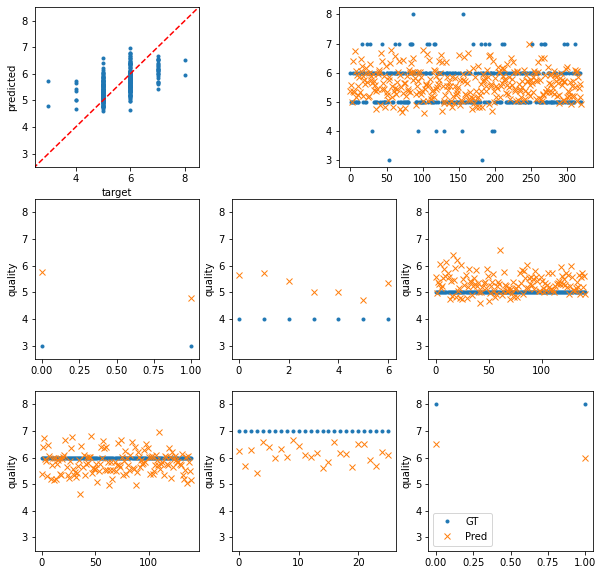

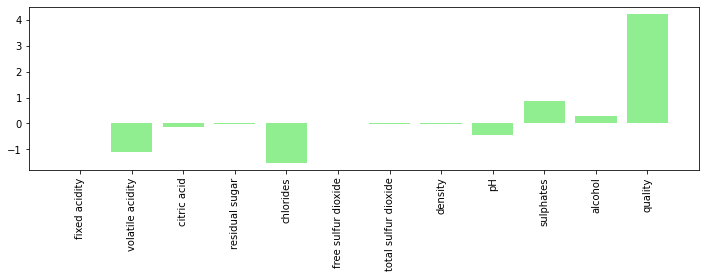

`TODO15.4` Write your thought about the plots above. 

`Answer`

## Lasso Regression 



<div id='TODO16'></div>

### TODO16 (7 points):

This time we are repeat all with Lasso regression. 

1. Combine all the process and the modify the code to use Lasso. You can simply copy the four above code cells and modify it to repeat the same process but with Lasso this time. 
2. State what you think about the results. 

Test score:  0.20204891172036665


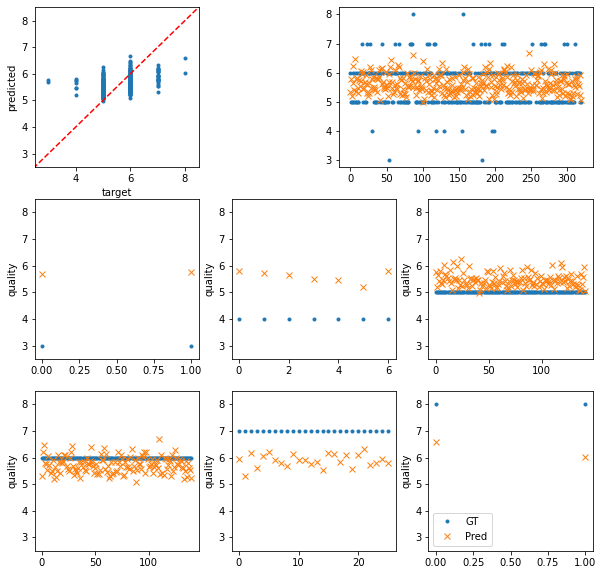

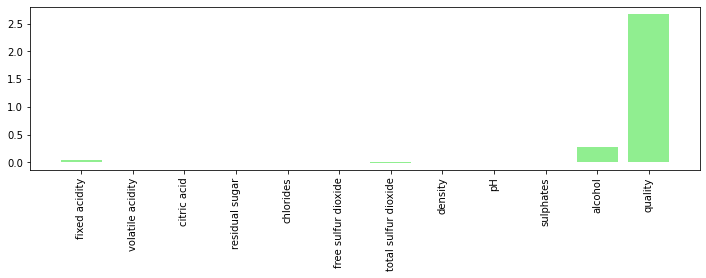

In [53]:
# 1) import 
from sklearn.linear_model import # TODO: import proper model here

# TODO: 3) initialize


# TODO: 4) train the model


# TODO: 5) evaluate


# TODO: prediction for X_test


# TODO: evalute with plots (call evalute function)


# TODO: present the weights (call show_weights)



`TODO16.2` Write your thought about the plots above. 

`Answer`

## Elastic Net 


<div id='TODO17'></div>

### TODO17 (7 points):

This time we are repeat all with Lasso regression. 

1. Combine all the process and the modify the code to use ElasticNet. This time, you are copying the Lasso practice and then modify it for ElasticNet.
2. State what you think about the results. 

Test score:  0.2816011852324025


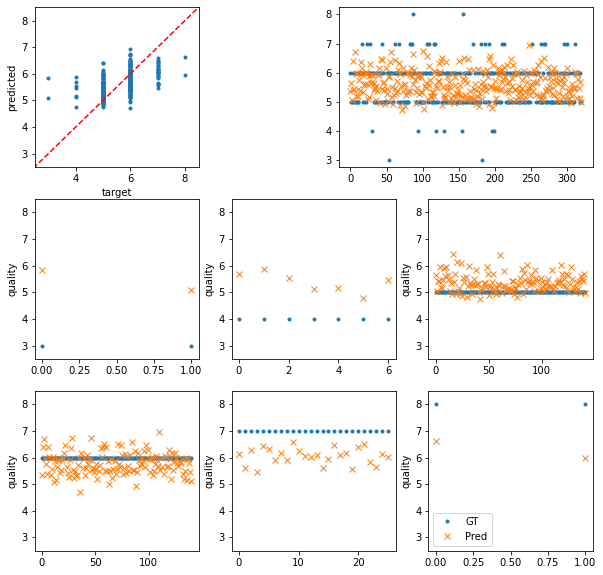

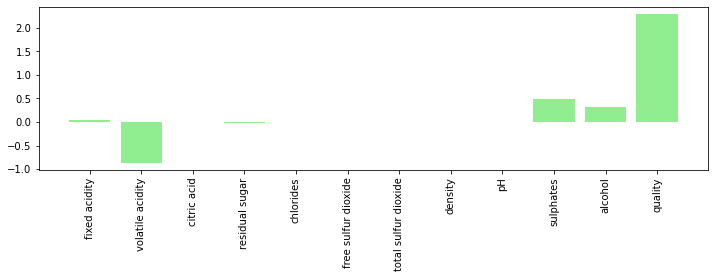

In [56]:
# 1) import 
from sklearn.linear_model import # TODO: import proper model here

# TODO: 3) initialize


# TODO: 4) train the model


# TODO: 5) evaluate


# TODO: prediction for X_test


# TODO: evalute with plots (call evalute function)


# TODO: present the weights (call show_weights)



`TODO17.2` Write your thought about the plots above. 

`Answer`

## Stochastic Gradient Descent (SGD)



<div id='TODO18'></div>

### TODO18 (7 points):

This time we are repeat all with stochastic gradient descent. 

1. Combine all the process and the modify the code to use ElasticNet. Well, simply repeat copy-and-modify for SGD. 
2. State what you think about the results. 

Test score:  -6.853721048575008e+21


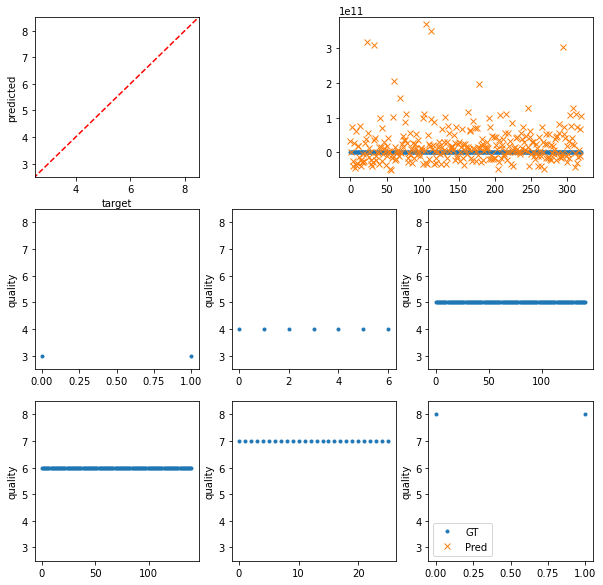

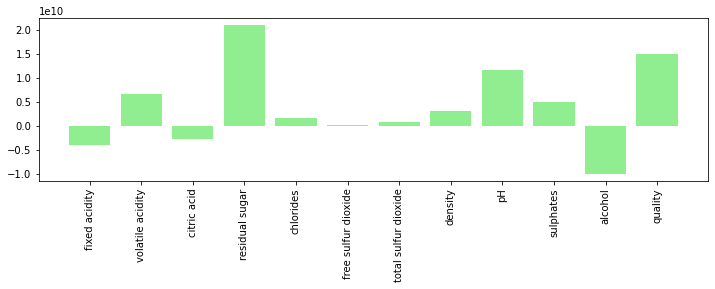

In [57]:
# 1) import 
from sklearn.linear_model import # TODO: import proper model here

# TODO: 3) initialize


# TODO: 4) train the model


# TODO: 5) evaluate


# TODO: prediction for X_test


# TODO: evalute with plots (call evalute function)


# TODO: present the weights (call show_weights)



`TODO18.2` Write your thought about the plots above. 

`Answer`

Well, SGD won't work well as it deals with one data sample not the overall and computing the average. Thus, scale of the data matters a lot as it updates the weights for individual samples. This is what [scikit-lean website](https://scikit-learn.org/stable/modules/sgd.html#tips-on-practical-use) says:

> Stochastic Gradient Descent is sensitive to feature scaling, so it is highly recommended to scale your data. For example, scale each attribute on the input vector X to [0,1] or [-1,+1], or standardize it to have mean 0 and variance 1. Note that the same scaling must be applied to the test vector to obtain meaningful results.


We will learn and practice data preprocessing including normalizing the data. 

<div id='TODO19'> </div>

# DISCUSSION 


### TODO19 (on Canvas NOT here):

We played with many linear regression models today. What do you think about the differences between the results? 
You can go to the discussion on Canvas to share your experience. 

# Streamlit 


<div id='TODO_EXTRA'> </div>

### TODO (Extra Credit +1)

Let us streamlit the models for comparison by using `evaluate` and `show_weights`. 
Your final interface does not need to be exactly same but to secure an extra credit, you need to 
1. include all the models we paracticed
2. the parameters are controllable so you can observe the effects of choosing different values interactively. 
3. you should use both `evaluate` and `show_weights` at minimum. 



In [80]:
%%writefile wine_linreg.py

import streamlit as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
# TODO: Import all the linear regression models that you used here
from sklearn.linear_model import 

# SETTING PAGE CONFIG TO WIDE MODE
st.set_page_config(layout="wide")

# LOADING DATA
DATA_URL = (
    "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
)

"""
# Wine-Quality Prediction with Linear Regression Models

Abstract: Two datasets are included, related to red and white vinho verde wine samples, from the north of Portugal. The goal is to model wine quality based on physicochemical tests.
"""

@st.cache
def load_data(nrows):
    data = pd.read_csv(DATA_URL, sep=';', nrows=nrows)
    
    # TODO: split training and testing to 80/20
    X_train, X_test, t_train, t_test = 
    return data, X_train, X_test, t_train, t_test

data, X_train, X_test, t_train, t_test = load_data(100000)


"## Summary"    
st.dataframe(data.describe())


#################### functions 
## TODO: copy and paste the evaluate and show_weights functions here to use 

####################



# TODO: Add your codes to observe different models



Overwriting wine_linreg.py


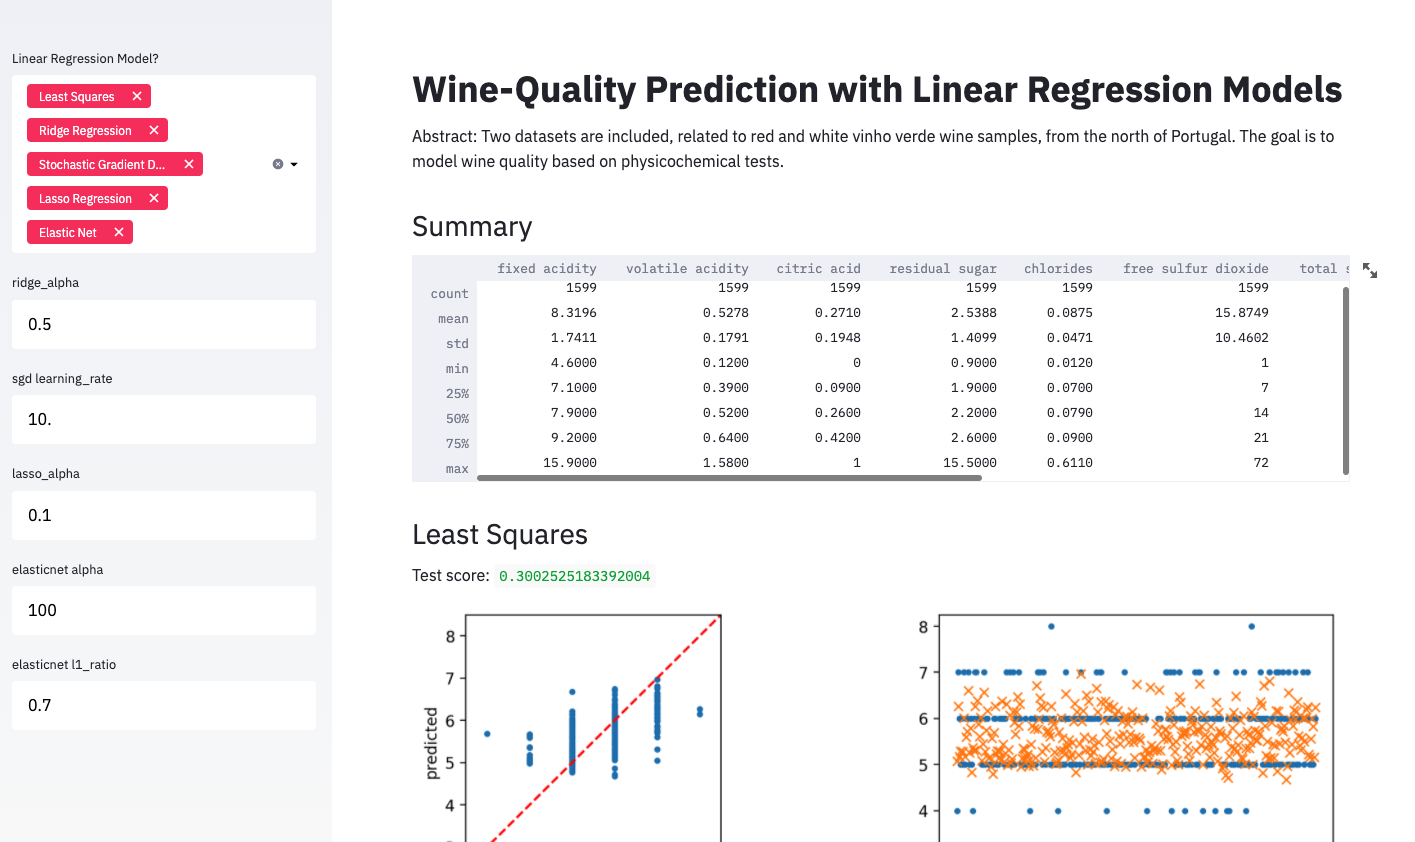